In [1]:
from matplotlib import pyplot as plt
import numpy as np    

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [2]:
# predicted y for all elements of dataset = X*theta
# X - rows are data points
# theta - column feature vector
def hypothesis(X,theta):
    return np.dot(X,theta)

In [3]:
# initialise example
data_x = np.array([1,2,3])
data_y = np.array([1,2,2])

# prepare X by appending an extra column of 1s to the begining
m = len(data_x)
x_0 = np.ones(m)
X = np.column_stack((x_0,data_x))
theta = np.array([0,10])

In [4]:
# cost function writen as 
#    v = hypothesis(X,theta) - y :- results in a column vector with length equal to the number of data points 
#    J(theta) = (v' * v) / 2m
def costFunction(X,theta,y,Lambda = 0):
    v = hypothesis(X,theta)-y
    regVec = theta[1:]
    return ((np.dot(np.transpose(v),v))/(2*len(X)))+Lambda*np.dot(regVec,regVec)

In [5]:
# gradients for each parameter writen as 
#    v = hypothesis(X,theta) - y :- results in a column vector with length equal to the number of data points
#    gradient(theta) = (X' * v) / m
def gradient(X,theta,y,Lambda = 0):
    v = hypothesis(X,theta)-y
    
    reqThetaVec = np.ones(len(theta))
    reqThetaVec[0] = 0
    regularizedGradientComponent = reqThetaVec*theta*Lambda/len(X)
#     print(regularizedGradientComponent)
    return ((np.dot(np.transpose(X),v))/(len(X)))+regularizedGradientComponent

In [6]:
import copy

# learning rate
alpha = 0.01

# Stopping threshold
delta = 10**-6

# initialised prev_cost
prev_cost = 1000000

while True:
    
    # stopping variable
    endLoop = True
    
    # copy the previous theta vector
    theta_prev = copy.deepcopy(theta)
    
    # call the cost function
    cost = costFunction(X,theta,data_y,10)
    gradients = gradient(X,theta,data_y,10)
    
    # ensure that we are moving in the right direction
    if prev_cost<cost:
        raise ValueError
#     print(cost,gradients)
    # reassign prev_cost to current cost
    prev_cost = cost

    theta = theta - alpha*gradients
    
    # check if the algorithm can terminate and terminate
    if np.all(abs(theta - theta_prev)<delta):
        break


print(theta)

[1.49978867 0.08338946]


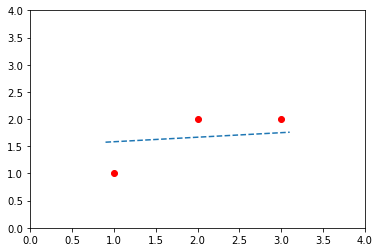

In [7]:
plt.plot(data_x,data_y, 'ro')
abline(theta[1],theta[0])
axes = plt.gca()
axes.set(xlim=(0, 4), ylim=(0, 4))
plt.show()